In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud


In [3]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

In [ ]:
data_loader = SlackDataLoader("../anonymized/")

# Load data from a Slack channel
slack_data = data_loader.get_users()
slack_data2 = data_loader.get_channels()
random_df=os.path.join("../anonymized/",'random/*')
week1_path=os.path.join("../anonymized/",'all-week1/*')
week1_df=data_loader.slack_parser(week1_path)
random_df=data_loader.slack_parser(random_df)
get_top_20_user(random_df, channel='Random')
draw_avg_reply_count(random_df, channel='Random')
draw_avg_reply_users_count(random_df, channel='Random')
draw_wordcloud(week1_df, random_df)
draw_user_reaction(random_df, channel='General')



### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br>
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

In [4]:
def get_top_20_user(data, channel='Random'):
    """get user with the highest number of message sent to any channel"""

    data['sender_name'].value_counts()[:20].plot.bar(figsize=(15, 7.5))
    plt.title(f'Top 20 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

    data['sender_name'].value_counts()[-10:].plot.bar(figsize=(15, 7.5))
    plt.title(f'Bottom 10 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def draw_avg_reply_count(data, channel='Random'):
    """who commands many reply?"""

    data.groupby('sender_name')['reply_count'].mean().sort_values(ascending=False)[:20]\
        .plot(kind='bar', figsize=(15,7.5));
    plt.title(f'Average Number of reply count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_avg_reply_users_count(data, channel='Random'):
    """who commands many user reply?"""

    data.groupby('sender_name')['reply_users_count'].mean().sort_values(ascending=False)[:20].plot(kind='bar',
     figsize=(15,7.5));
    plt.title(f'Average Number of reply user count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_wordcloud(msg_content, week):    
    # word cloud visualization
    allWords = ' '.join([twts for twts in msg_content])
    wordCloud = WordCloud(background_color='#975429', width=500, height=300, random_state=21, max_words=500, mode='RGBA',
                            max_font_size=140, stopwords=stopwords.words('english')).generate(allWords)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout()
    plt.title(f'WordCloud for {week}', size=30)
    plt.show()

def draw_user_reaction(data, channel='General'):
    data.groupby('sender_name')[['reply_count', 'reply_users_count']].sum()\
        .sort_values(by='reply_count',ascending=False)[:10].plot(kind='bar', figsize=(15, 7.5))
    plt.title(f'User with the most reaction in #{channel}', size=25);
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [17]:
# which user has the highest number of reply counts?
random_df = data_loader.slack_parser(os.path.join("../anonymized/", 'random/*'))
user_reply_counts = random_df.groupby('sender_name')['reply_count'].sum()
top_user_reply_count = user_reply_counts.idxmax()
print(f"The user with the highest number of reply counts is: {top_user_reply_count}")


The user with the highest number of reply counts is: Anthony Galloway


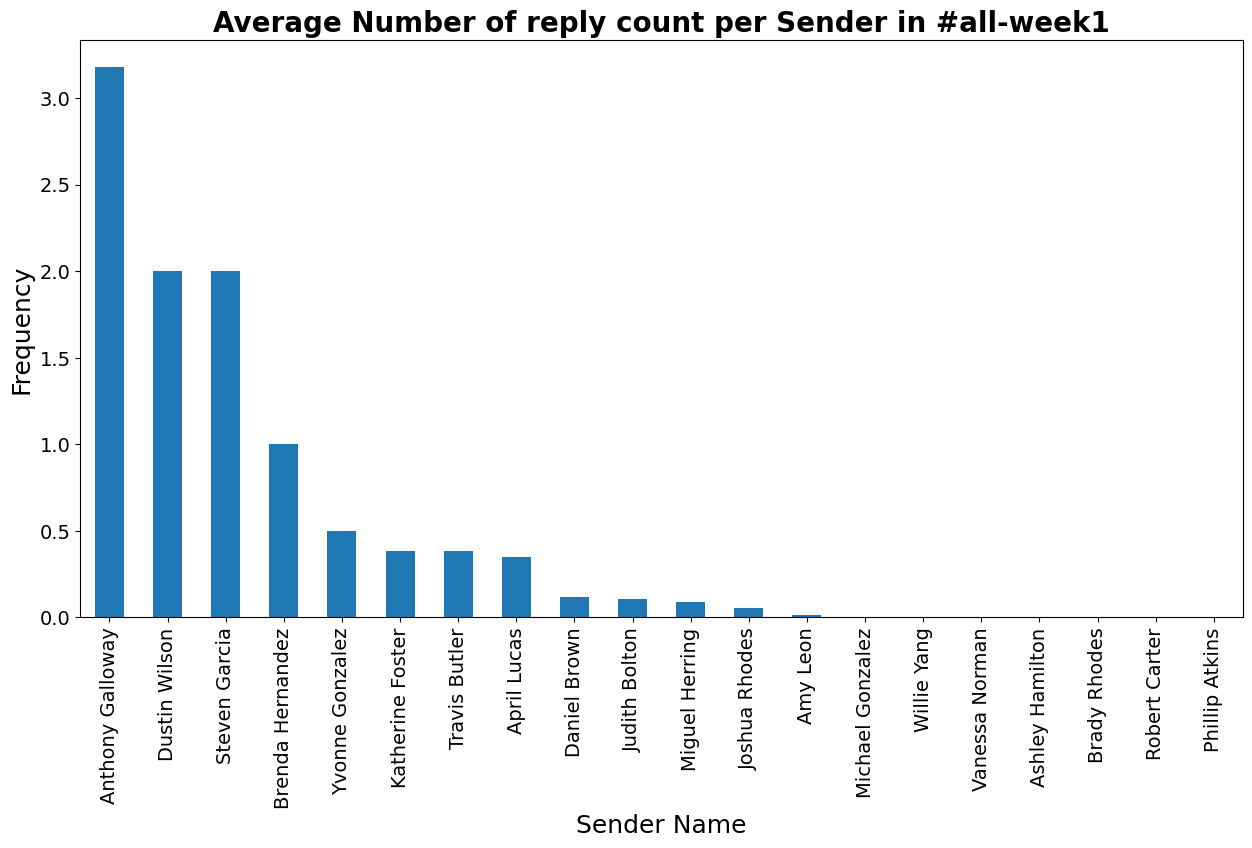

In [20]:
# Visualize reply counts per user per channel
#week1_df = data_loader.slack_parser(os.path.join("../anonymized/", 'all-week1/*'))
random_df = data_loader.slack_parser(os.path.join("../anonymized/", 'random/*'))
# Draw a bar plot for average reply counts per sender in the 'all-week1' channel
draw_avg_reply_count(random_df, channel='all-week1')


In [24]:
# what is the time range of the day that most messages are sent?
# Load data from the 'all-week1' channel
week1_df = data_loader.slack_parser(os.path.join("../anonymized/", 'all-broadcast/*'))

# Assuming your DataFrame has a 'time_sent' column in Unix timestamp format
# Convert the 'time_sent' column to readable timestamp
week1_df['ts'] = utils.convert_2_timestamp('ts', week1_df)

# Plot a histogram to visualize the time range of the day with the most messages
utils.plot_time_range_distribution(week1_df, 'all-week1')




ts not in data


AttributeError: module 'src.utils' has no attribute 'plot_time_range_distribution'

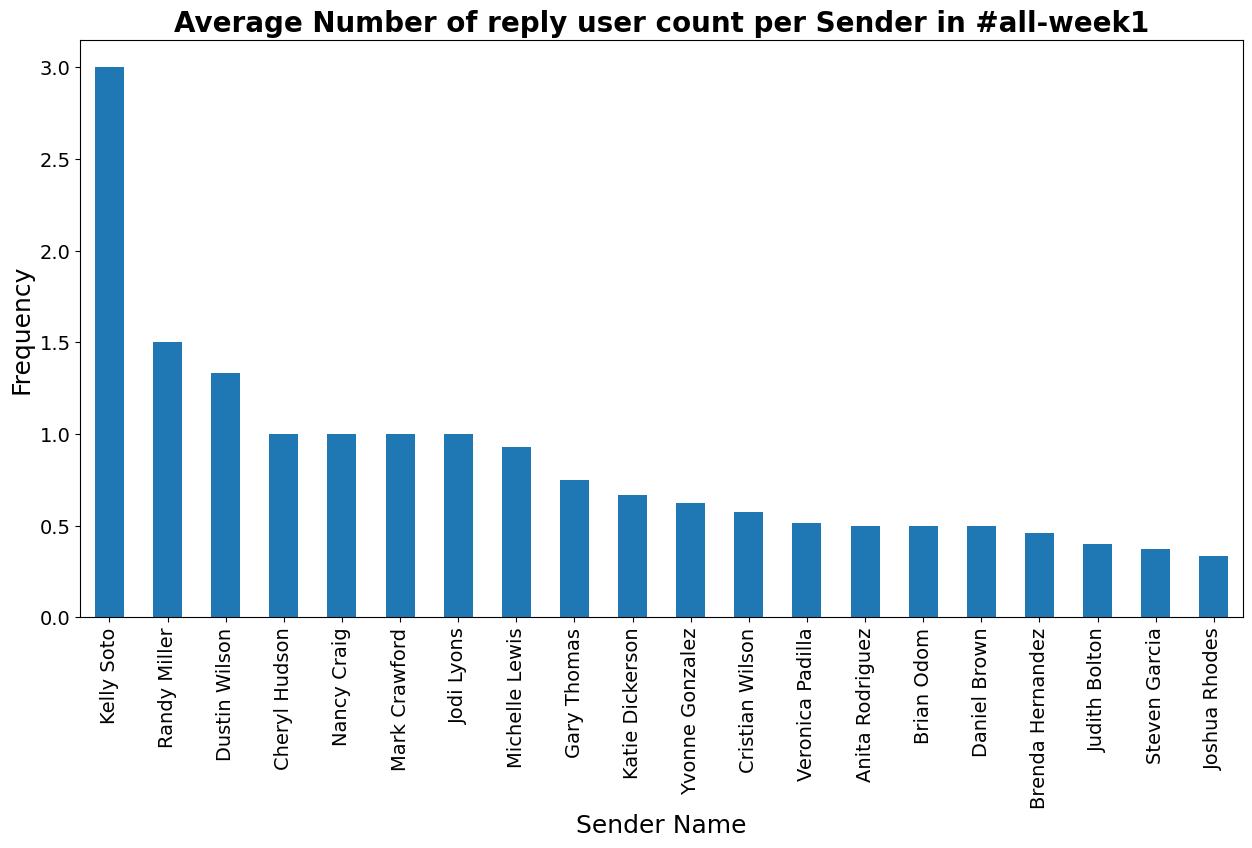

In [34]:
# what kind of messages are replied faster than others?
# Load data from the 'all-week1' channel
week1_df = data_loader.slack_parser(os.path.join("../anonymized/", 'all-week1/*'))

# Draw a bar plot for average reply user counts per sender in the 'all-week1' channel
draw_avg_reply_users_count(week1_df, channel='all-week1')


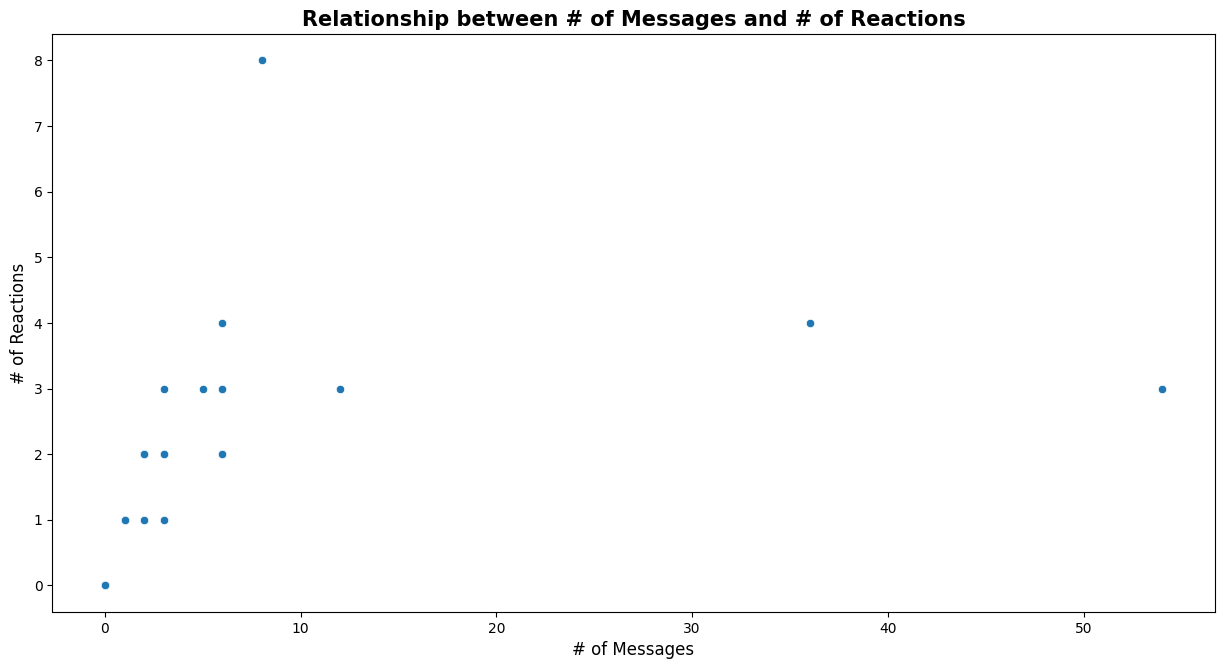

In [35]:
# Relationship between # of messages and # of reactions
plt.figure(figsize=(15, 7.5))
sns.scatterplot(x='reply_count', y='reply_users_count', data=random_df)
plt.title('Relationship between # of Messages and # of Reactions', size=15, fontweight='bold')
plt.xlabel('# of Messages', size=12); plt.ylabel('# of Reactions', size=12)
plt.show()


In [42]:
# Classify messages into different categories such as questions, answers, comments, etc.




KeyError: 'message_content'

In [40]:
# Which users got the most reactions?
users_with_most_reactions = random_df.groupby('sender_name')['reply_users_count'].sum().idxmax()
most_reactions_count = random_df.groupby('sender_name')['reply_users_count'].sum().max()
print(f"The user with the most reactions is: {users_with_most_reactions} with {most_reactions_count} reactions.")


The user with the most reactions is: Katherine Foster with 16 reactions.


In [44]:
# Model topics mentioned in the channel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def extract_topics_model(messages):
    # Implement your logic to extract topics using NMF or other techniques
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(messages)
    nmf_model = NMF(n_components=5, random_state=42)
    nmf_model.fit(tfidf_matrix)
    return nmf_model

week1_df = data_loader.slack_parser(os.path.join("../anonymized/", 'all-week1/*'))
topics_model = extract_topics_model(week1_df['message_content'])

# Display the extracted topics
utils.display_topics(topics_model)


KeyError: 'message_content'

In [14]:
# What are the topics that got the most reactions?
# Assuming you have a function to identify topics with most reactions, let's call it topics_with_most_reactions
def topics_with_most_reactions(messages):
    # Your logic to identify topics with most reactions here
    pass

# Apply the function to the messages in the channel
most_reacted_topics = topics_with_most_reactions(random_df['text'])
print("Topics with the Most Reactions:")
print(most_reacted_topics)


KeyError: 'text'

### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?